### Robustness check over Gaussian-based performance landscapes

This script conducts multiple simulations, across classes of landscapes and RL noise levels, and generates summary statistics.

In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt                            
from ipynb.fs.full.DualPathwayModel import Model as Model
import os
from matplotlib import patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# Parameters

perf_threshold = 0.6                   # Success threshold
n_global_optima = 1                    # 1 for Gaussian-based landscapes and 3 for Syrinx-based landscapes

nrpd = 100                             # No. of simulations per scenario
n_distractors = 3                      # No. of landscapes classes (Low, Medium, High)
n_repeat = nrpd*n_distractors + 1

nd = 60                                # No. of days in simulation
lr = 0.1                               # Learning rate of simulation
ntpd = 1000                            # No. of trials per day of simulation

noiseVal = [0.2, 0.3, 0.4, 0.5]        # RL noise levels to be tested
distractor_vals = [5,40,160]           # No. of Gaussian hills to superimpose

Fig_path = 'ModelwArtificial_' + str(nd) + 'd_0' + str(int(lr*100)) +'eta/'

In [3]:
overall_rseed = 1000
np.random.seed(overall_rseed)

rseeds = np.random.randint(0, 1e9, size=n_repeat)

# Stores performance metrics of each simulation
Performance = {}                        
Performance['rseeds'] = rseeds 

Uncomment following cell to generate several simulations on the Gaussian based performance landscapes.

Leave it commented if the simulations have already been run previously and the corresponding Performance.npy is available.

In [4]:
# # Conducts batch simulations over all specified scenarios and saves corresponding performance metrics

# for noiseLim in noiseVal:
#     fig_path = Fig_path + 'Noise_0'+ str(int(noiseLim*100)) + '/'

#     if not os.path.isdir(fig_path):
#         os.makedirs(fig_path, exist_ok=False)
#     else:
#         print(fig_path + " already exists.")
    
#     Ravg = np.zeros(n_repeat)
#     Davg = np.zeros((n_repeat, n_global_optima))    
#     Npeaks = np.zeros(rseeds.size)

#     for run, rseed in enumerate(rseeds[:-1]):
#         distractor = distractor_vals[run//nrpd]
#         perf_file = fig_path+ str(run) + '_' + str(rseed) + '_' + str(distractor) + '_performance.npy'
#         if os.path.isfile(perf_file):
#             print("retrieving ", perf_file)
#             stored_perf=np.load(perf_file)
#             Ravg[run], Davg[run], Npeaks[run] = stored_perf
#         else:
#             ModelObj = Model(rseed, run, distractor, noiseLim, fig_path, eta=lr, n_days=nd, ntrialspday=ntpd, simulation=True, contour_type='Artificial')
#             Ravg[run], Davg[run], Npeaks[run] = ModelObj.simulate()
#             # ModelObj.plot_results()       # Uncomment if you wish to generate plots for individual simulations

#     run = n_repeat-1
#     rseeds[run] = 3456
#     rseed = rseeds[run]
#     distractor = 40
#     perf_file = fig_path+ str(run) + '_' + str(rseed) + '_' + str(distractor) + '_performance.npy'
#     if os.path.isfile(perf_file):
#         print("retrieving ", perf_file)
#         stored_perf=np.load(perf_file)
#         Ravg[run], Davg[run], Npeaks[run] = stored_perf
#     else:
#         ModelObj = Model(rseed, run, distractor, noiseLim, fig_path, eta=lr, n_days=nd, ntrialspday=ntpd, simulation=True, contour_type='Artificial')
#         Ravg[run], Davg[run], Npeaks[run] = ModelObj.simulate()
            
#     Performance[noiseLim*100] = {}
#     Performance[noiseLim*100]['RewardPerf'] = Ravg
#     Performance[noiseLim*100]['DistancePerf'] = Davg
#     Performance[noiseLim*100]['Npeaks'] = Npeaks
    
#     np.save(Fig_path + 'Performance', Performance)

In [5]:
# Loads performance metrics of previously generated simulations
# From here on, the script requires a file ModelwArtificial_60d_010eta/Performance.npy generated by the previous cell.

Performance = np.load(Fig_path + 'Performance.npy').item()

Text(0.5, 0.98, 'Artificial contour')

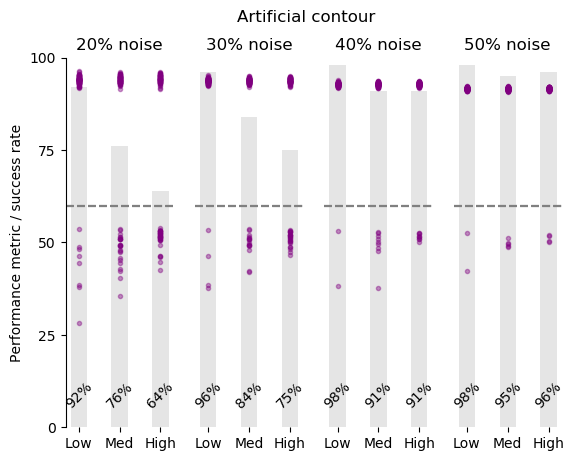

In [6]:
# Plots summary figure of performance metrics across noise levels and landscape classes.

figure, ax = plt.subplots(1, len(noiseVal))
if len(noiseVal) == 1: ax = [ax]
k = 0
for noiseLim in noiseVal:
    PerfMetric = Performance[noiseLim*100]['RewardPerf']


#     plt.title('Dual pathway with ' + str(int(noiseLim*100)) + '% noise', y=1.15, x=-1.25)

    for i in range(n_distractors):
        ax[k].plot(np.ones(nrpd)*(i+1)*10, PerfMetric[i*nrpd:(i+1)*nrpd]*100, lw=0, marker='.', color='purple', alpha=0.4)
        p = np.sum(PerfMetric[i*nrpd:(i+1)*nrpd]>perf_threshold) * 100 / nrpd
        ax[k].bar((i+1)*10, p, width=4, color='grey', alpha=0.2)
        ax[k].text((i+1)*10, 10, str(int(p))+'%', color='black', ha='center', rotation = 45)

        ax[k].axhline(y=perf_threshold*100, color='grey', linestyle='--')

        ax[k].set_ylim(0,100)
        ax[k].set_title(str(int(noiseLim*100))+"% noise")

        ax[k].spines['top'].set_visible(False)
        ax[k].spines['right'].set_visible(False)
        ax[k].spines['bottom'].set_visible(False)
        ax[k].spines['left'].set_visible(False)
        ax[k].get_yaxis().set_ticks([])
        ax[k].get_xaxis().set_ticks([10, 20, 30])
        ax[k].get_xaxis().set_ticklabels(['Low', 'Med', 'High'])
        
    
    k = k + 1
        
        
ax[0].set_ylabel('Performance metric / success rate')
ax[0].get_yaxis().set_ticks([0, 25, 50, 75, 100])
ax[0].spines['left'].set_visible(True)
# plt.xlabel('Distractors', x=-1.25)
figure.suptitle('Artificial contour')

# plt.savefig('ModelwArtificial_60d_010eta/GaussianLandscape_vs_Noise.png')

### Figure #4A

The following cell generates the summary plot shown in Figure 4A.

The plots will be saved in the Figures folder in the current directory.

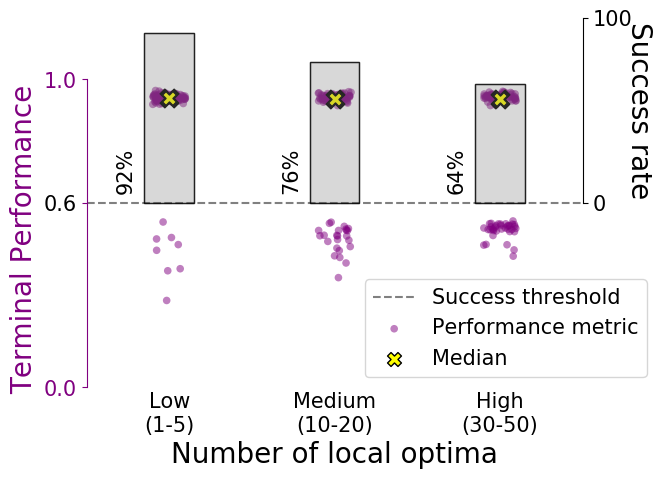

In [7]:
# Plots summary figure of performance metrics with 20% RL noise level across landscape classes.

np.random.seed(0)
noiseVal = [.2]

for noiseLim in noiseVal:
    fig_path = Fig_path + 'Noise_0'+ str(int(noiseLim*100)) + '/'
    
    PerfMetric = Performance[noiseLim*100]['RewardPerf']

    figure, ax = plt.subplots(1)
    axt = ax.twinx()


#     figure.suptitle('Gaussian-based contour with ' + str(int(noiseLim*100)) + '% noise', fontsize=20)
    
  
    for i in range(n_distractors):
        Perf_x = np.ones(nrpd)*(i+1)*10 + np.random.uniform(-1,1,nrpd)
        Perf_y = PerfMetric[i*nrpd:(i+1)*nrpd]
        Perf_noiseLim = PerfMetric[i*nrpd:(i+1)*nrpd]
        P_abovethres = Perf_noiseLim[Perf_noiseLim>perf_threshold]
        p = P_abovethres.size * 100 / nrpd

        axt.bar((i+1)*10, p, 3, bottom=0, align='center', edgecolor='black', color='grey', alpha=0.3)
        axt.bar((i+1)*10, p, 3, bottom=0, align='center', edgecolor='black', color='', alpha=.8)
        axt.text((i+1)*10-2, 5, str(int(p))+'%', color='black', ha='right', va='bottom', rotation=90, fontsize=15)


        im = ax.scatter(Perf_x, Perf_y, c='purple', s=30, alpha=.5, vmin=0, vmax=1, edgecolor='None', label=('Performance metric'*(i==0)))
        ax.scatter((i+1)*10, np.median(Perf_y), s=180, facecolors='black', edgecolors='black', marker='X', alpha=1)
        ax.scatter((i+1)*10, np.median(Perf_y), s=100, facecolors='yellow', edgecolors='black', marker='X', alpha=1, label=('Median'*(i==0)))          
        
    ax.axhline(y=perf_threshold, color='grey', linestyle='--', label='Success threshold')

    ax.set_ylim(0,1.2)
    ax.set_xlim(5,35)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(True)
    
    ax.get_yaxis().set_ticks([0, .6, 1.0])
    ax.get_xaxis().set_ticks([10, 20, 30])
    ax.get_xaxis().set_ticklabels(['Low\n(1-5)', 'Medium\n(10-20)', 'High\n(30-50)'], fontsize=15)
    ax.tick_params(axis='x', which='both', length=0,labelsize=15)
    ax.spines['left'].set_bounds(0, 1)
    ax.set_ylabel('Terminal Performance', fontsize=20,y=0.4)
    ax.set_xlabel('Number of local optima', fontsize=20)
    ax.yaxis.label.set_color('Purple')
    ax.spines['left'].set_color('Purple')
    ax.tick_params(axis='y', colors='Purple',labelsize=15)
    ax.get_yticklabels()[1].set_color('black') 



    axt.spines['top'].set_visible(False)
    axt.spines['left'].set_visible(False)
    axt.spines['bottom'].set_visible(False)
    axt.spines['right'].set_visible(True)
    axt.yaxis.label.set_color('black')
    axt.tick_params(axis='y', colors='black',labelsize=15)
    axt.set_ylim(-100,100)
    axt.spines['right'].set_bounds(0, 100)
    axt.get_yaxis().set_ticks([0, 100])
    axt.set_ylabel('Success rate',y=.75, fontsize=20, rotation=270,labelpad=15)

    
    
    

    ax.legend(loc='lower right', frameon=True, fontsize=15, bbox_to_anchor=(1.15,0))

        

    # Display colorbar
#     cbar = figure.colorbar(im, cax=cbax)
#     cbar.set_ticks([0,1])
#     cbar.set_label('Density', rotation=270)#, fontsize=10, labelpad=15)
            

    plt.savefig('Figures/Fig4A' + '.png', rasterized=True, bbox_inches="tight")